# Movie Review Analysis

In [144]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.metrics import plot_confusion_matrix, classification_report

import warnings
warnings.filterwarnings("ignore")

In [114]:
df = pd.read_csv("moviereviews.csv")

In [115]:
df.head()

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...


In [116]:
df.shape

(2000, 2)

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   2000 non-null   object
 1   review  1965 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


In [118]:
# Removing Rows Containing Null Reviews:

df = df.dropna()

In [119]:
df.shape

(1965, 2)

#### Checking if any Reviews are Blank Strings like "" or " " or  "  ":
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.isspace.html

In [120]:
"  ".isspace()

True

In [121]:
"shailya".isspace()

False

In [122]:
"s          ".isspace()

False

In [123]:
"".isspace()

False

In [124]:
df["review"].str.isspace()

0       False
1       False
2       False
3       False
4       False
        ...  
1995    False
1996    False
1997    False
1998    False
1999    False
Name: review, Length: 1965, dtype: bool

In [125]:
df["review"].str.isspace().sum()

27

In [126]:
df[df["review"].str.isspace()]

,label,review
57,neg,
71,pos,
147,pos,
151,pos,
283,pos,
307,pos,
313,neg,
323,pos,
343,pos,
351,neg,


In [127]:
df = df[df["review"].str.isspace() != True]

In [128]:
df.head()

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...


In [129]:
df.shape

(1938, 2)

### Train Test Split:

In [130]:
x = df["review"]

In [131]:
y = df["label"]

In [132]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 42)

In [133]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1550,)
(388,)
(1550,)
(388,)


### TfIdf Vectorization:

In [134]:
tfidf = TfidfVectorizer(stop_words= "english")

In [135]:
tfidf.fit(x_train)

TfidfVectorizer(stop_words='english')

In [136]:
x_train_tfidf = tfidf.transform(x_train)

In [137]:
x_train_tfidf

<1550x35472 sparse matrix of type '<class 'numpy.float64'>'
	with 378038 stored elements in Compressed Sparse Row format>

In [138]:
x_test_tfidf = tfidf.transform(x_test)

In [139]:
x_test_tfidf

<388x35472 sparse matrix of type '<class 'numpy.float64'>'
	with 89585 stored elements in Compressed Sparse Row format>

### Model Fitting and Evaluation Function:

In [140]:
def model_fit_eval(model, param_dict):
    
    grid_model = GridSearchCV(estimator= model, param_grid= param_dict, cv=5)
    
    grid_model.fit(x_train_tfidf, y_train)
    
    print("Best Parameters:\n")
    
    print(grid_model.best_params_)
    
    print("\n")
    
    pred = grid_model.predict(x_test_tfidf)
    
    print(classification_report(y_test, pred))
    
    plot_confusion_matrix(grid_model.best_estimator_, x_test_tfidf, y_test)

### Models:

#### 1) Naive Bayes:

In [141]:
nb_model = MultinomialNB()

In [142]:
param_dict = {"alpha" : [0, 0.01, 0.1, 0.5, 1],
             "fit_prior" : [True, False]}

Best Parameters:

{'alpha': 1, 'fit_prior': False}


              precision    recall  f1-score   support

         neg       0.78      0.87      0.83       188
         pos       0.87      0.78      0.82       200

    accuracy                           0.82       388
   macro avg       0.83      0.82      0.82       388
weighted avg       0.83      0.82      0.82       388



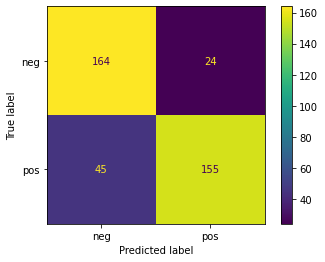

In [145]:
model_fit_eval(nb_model, param_dict)

#### 2) Logistic Regression:

In [146]:
log_model = LogisticRegression()

In [147]:
param_dict = {"penalty" : ["l1", "l2", "elasticnet"], "C" : np.logspace(0, 5, 10),
                                     "l1_ratio" : [0, 0.01, 0.1, 0.25, 0.5, 0.75, 0.9, 0.99, 1]}

Best Parameters:

{'C': 12.91549665014884, 'l1_ratio': 0, 'penalty': 'l2'}


              precision    recall  f1-score   support

         neg       0.85      0.85      0.85       188
         pos       0.86      0.86      0.86       200

    accuracy                           0.85       388
   macro avg       0.85      0.85      0.85       388
weighted avg       0.85      0.85      0.85       388



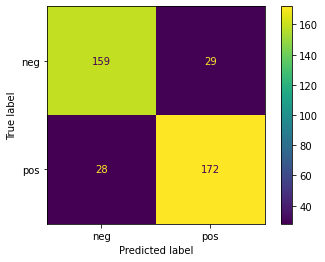

In [148]:
model_fit_eval(log_model, param_dict)

#### 4) Support Vector Machine:

In [149]:
svm_model = SVC()

In [150]:
param_dict = {"kernel" : ["linear", "rbf", "poly", "sigmoid"],
             "C" : [0.01, 0,1, 1, 10, 100],
             "degree" : [1,2,3], "gamma" : ["scale", "auto"]}

Best Parameters:

{'C': 1, 'degree': 1, 'gamma': 'scale', 'kernel': 'sigmoid'}


              precision    recall  f1-score   support

         neg       0.84      0.83      0.84       188
         pos       0.84      0.85      0.85       200

    accuracy                           0.84       388
   macro avg       0.84      0.84      0.84       388
weighted avg       0.84      0.84      0.84       388



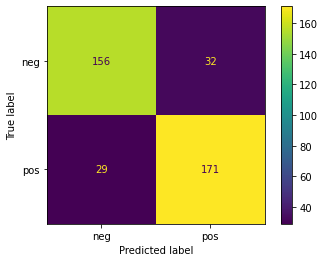

In [151]:
model_fit_eval(svm_model, param_dict)